<a href="https://colab.research.google.com/github/GlinskiiIvan/MRI-colab/blob/main/logarithmic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

Saving 04f7a9f7-00011-2f30e900.png to 04f7a9f7-00011-2f30e900 (4).png


Text(0.5, 1.0, 'Гистограмма оригинала')

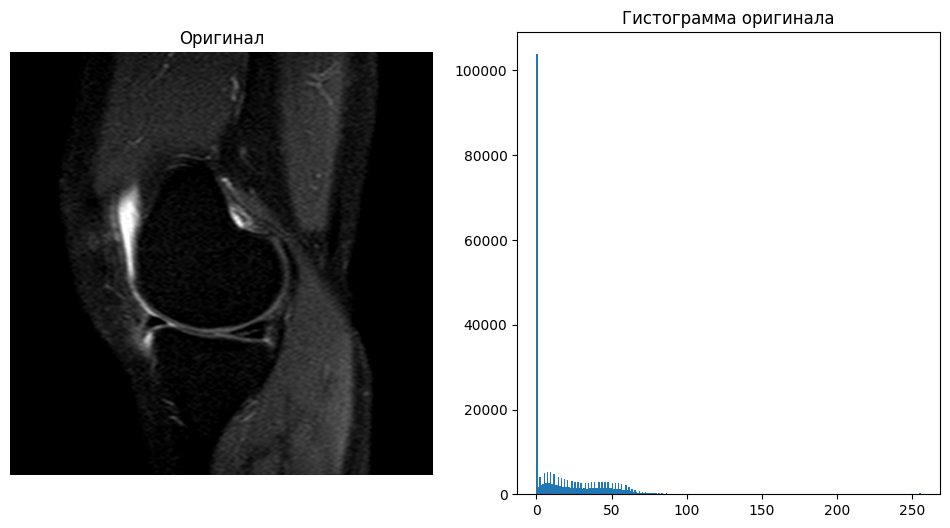

In [27]:
# Загрузка изображения
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Чтение изображения в градациях серого
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Проверка
if img is None:
    raise ValueError("Не удалось загрузить изображение!")

# Отображение
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Оригинал")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(img.ravel(), bins=256, range=(0, 256))
plt.title("Гистограмма оригинала")

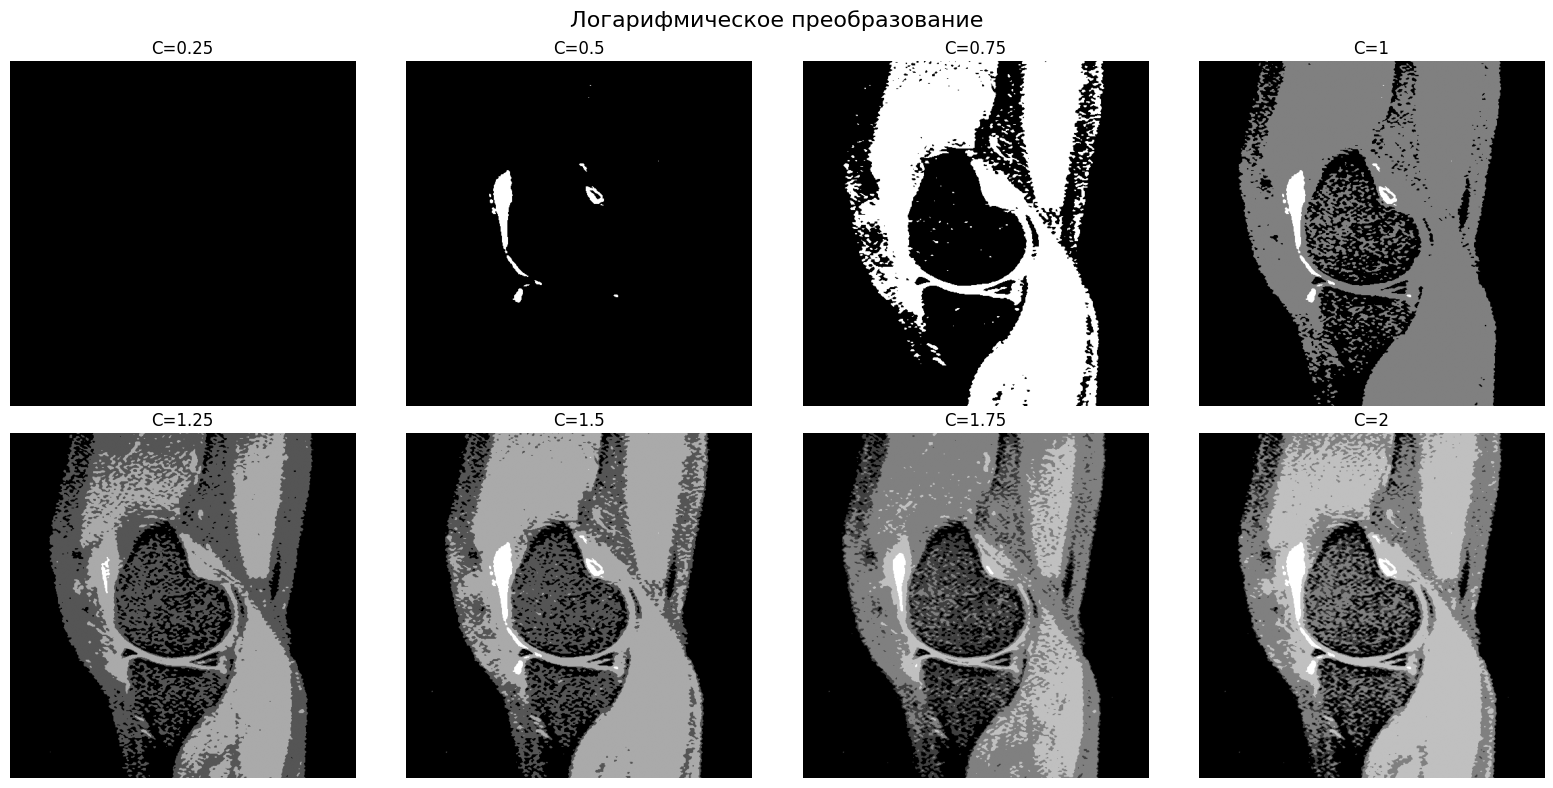

In [28]:
range_values = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

# Создаём сетку 2x4
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle("Логарифмическое преобразование", fontsize=16)

for idx, c in enumerate(range_values):
    log_img = c * np.log10(1 + img.astype(np.float32))

    # Нормализация обратно к 0–255
    #log_img_norm = cv2.normalize(log_img, None, 0, 255, cv2.NORM_MINMAX)
    #log_img_norm = log_img_norm.astype(np.uint8)

    # Приводим диапазон 0..255 вручную
    log_img = np.clip(log_img, 0, 255).astype(np.uint8)

    # Индекс строки и столбца
    row = idx // 4
    col = idx % 4

    # Определяем позицию в сетке
    ax = axes[row, col]
    #ax.imshow(log_img_norm, cmap='gray')
    ax.imshow(log_img, cmap='gray')
    ax.set_title(f"C={c}")
    ax.axis('off')

plt.tight_layout()
plt.show()